#### IMPORTING THE LIBRARIES ####

In [1]:
import numpy as np 
import pandas as pd 

#### READ THE DATASET ####

In [2]:
encodings=['utf-8','latin','ISO-8859-1','cp1252']
file_path=r"c:\Users\Bhuvaneswari\Desktop\SMS spam classifier\spam.csv"
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print("File successfully read with encoding:",encoding)
        break
    except UnicodeDecodeError:
        print("Failed to read encoding:",encoding)
        continue
if 'df' in locals():
    print('File loaded')
else:
    print('Failed to load')

Failed to read encoding: utf-8
File successfully read with encoding: latin
File loaded


#### SAMPLE OF THE DATASET ####

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2218,ham,Nice talking to you! please dont forget my pix...,NaN,NaN,NaN
1203,ham,Thanks for understanding. I've been trying to ...,NaN,NaN,NaN
1747,ham,I think u have the wrong number.,NaN,NaN,NaN
1972,ham,Yes but can we meet in town cos will go to gep...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
318,spam,December only! Had your mobile 11mths+? You ar...,NaN,NaN,NaN
5513,ham,Yes. Please leave at &lt;#&gt; . So that at ...,NaN,NaN,NaN
3324,ham,Nope... Juz off from work...,NaN,NaN,NaN
794,ham,There generally isn't one. It's an uncountable...,NaN,NaN,NaN
2295,ham,HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...,NaN,NaN,NaN


#### DATA MATRIX ####

In [4]:
df.shape

(5572, 5)

#### DATA CLEANING ####

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### DROPPING LAST 3 COLUMNS ####

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(10)

,v1,v2
21,ham,IÛ÷m going to try for 2 months ha ha only joking
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ..."
788,spam,"5 Free Top Polyphonic Tones call 087018728737,..."
887,ham,Y dun cut too short leh. U dun like ah? She fa...
1484,ham,"Sorry, I'll call later"
2492,ham,No drama Pls.i have had enough from you and fa...
2846,spam,Free-message: Jamster!Get the crazy frog sound...
961,spam,URGENT! We are trying to contact U. Todays dra...
1057,ham,Ard 515 like dat. Y?
2103,ham,Its a site to simulate the test. It just gives...


#### RENAMING COL1 AS TARGET AND COL2 AS TEXT ####

In [7]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(10)

,Target,Text
3720,ham,Blank is Blank. But wat is blank? Lol
2133,ham,Spoke with uncle john today. He strongly feels...
613,ham,THANX4 TODAY CER IT WAS NICE 2 CATCH UP BUT WE...
529,ham,Jay says that you're a double-faggot
1416,ham,No..few hours before.went to hair cut .
3069,ham,I'm now but have to wait till 2 for the bus to...
3920,ham,Do 1 thing! Change that sentence into: \Becaus...
2237,ham,"Give her something to drink, if she takes it a..."
3300,spam,RCT' THNQ Adrian for U text. Rgds Vatian
124,ham,ÌÏ predict wat time Ì_'ll finish buying?


#### LABEL ENCODING ####

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### MISSING VALUES ####

In [9]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

#### CHECKING FOR DUPLICATES ####

In [10]:
df.duplicated().sum()

403

#### REMOVING DUPLICATES ####

In [11]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

#### DATA EXPLORATION ####

In [13]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1fa8a209cd0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

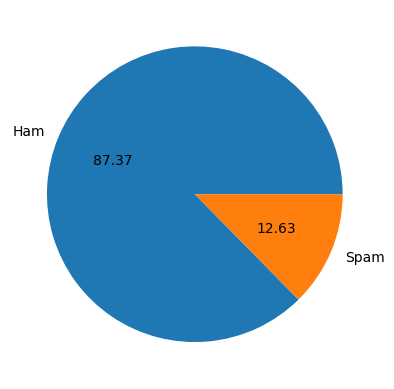

In [14]:
import matplotlib.pyplot as plt 
plt.pie(df['Target'].value_counts(),
labels=['Ham','Spam'],autopct='%0.2f')

In [15]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
df['num_char']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [17]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


#### TARGETING HAM(0) ####

In [18]:
df[df['Target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


#### TARGETING SPAM(1) ####

In [19]:
df[df['Target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


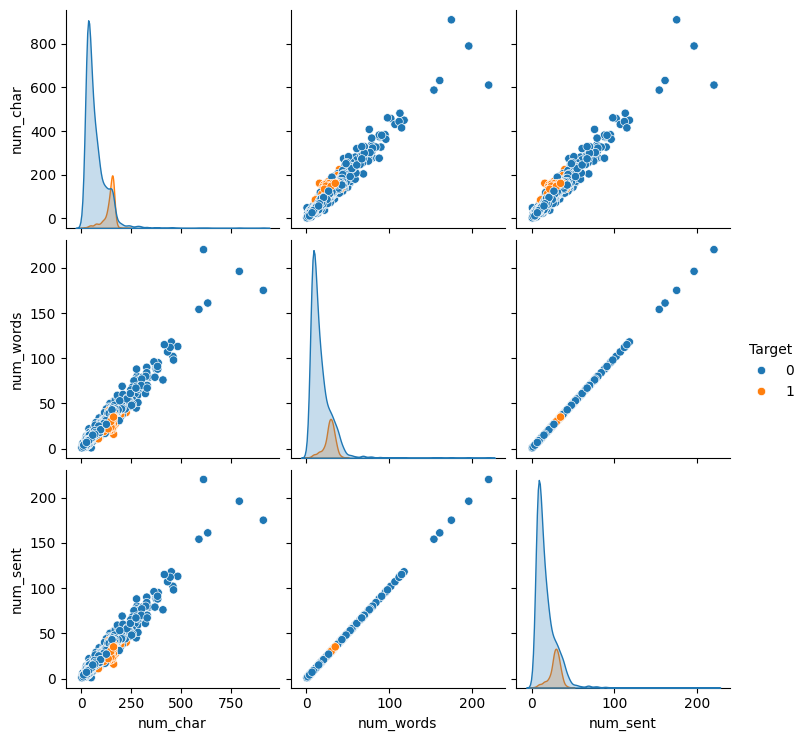

In [20]:
import seaborn as sns
sns.pairplot(df,hue='Target')


#### HEATMAP ####

<Axes: >

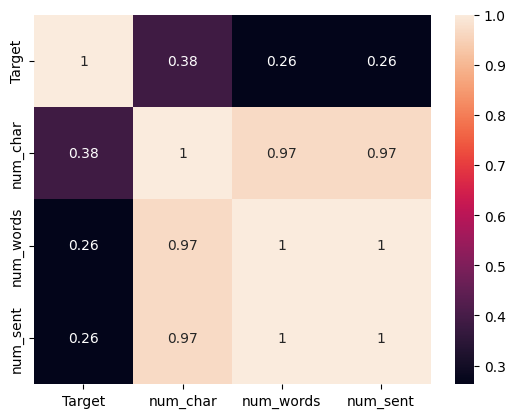

In [21]:
sns.heatmap(df[['Target','num_char','num_words','num_sent']].corr(),annot=True)

#### DATA PREPROCESSING ####

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()
def transformText(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        text=y[:]
        y.clear()
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
            text=y[:]
            y.clear()
        for i in text:
            y.append(ps.stem(i))
        return " ".join(y)
    transformed_Text=transformText("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
    print(transformed_Text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhuvaneswari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df['Text'][30]
{"type":"string"}
df["transformed_Text"]=df['Text'].apply(transformText)
df.head()

,Target,Text,num_char,num_words,num_sent,transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go
1,0,Ok lar... Joking wif u oni...,29,8,8,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free
3,0,U dun say so early hor... U c already then say...,49,13,13,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah


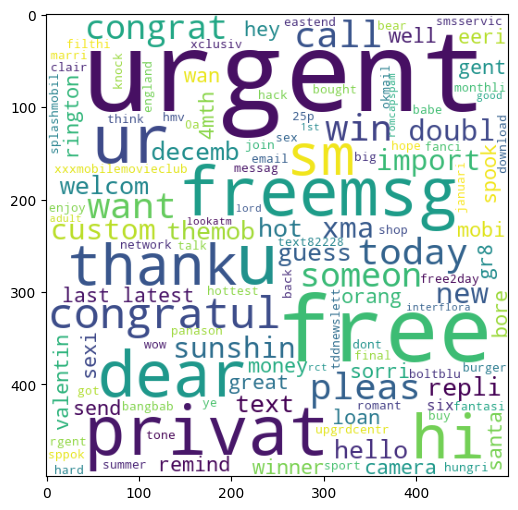

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target']==1]['transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

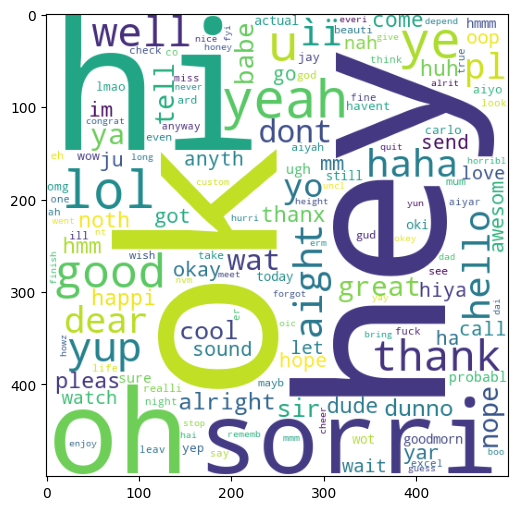

In [25]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [26]:
df.sample(5)

,Target,Text,num_char,num_words,num_sent,transformed_Text
3925,0,I havent add Ì_ yet right..,28,7,7,
1883,0,"Come to me, slave. Your doing it again ... Goi...",128,28,28,come
5484,0,", , and picking them up from various points ...",169,41,41,
1734,0,"I think we're going to finn's now, come",39,11,11,
3910,0,How i noe... She's in da car now... Later then...,77,21,21,


In [27]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

480

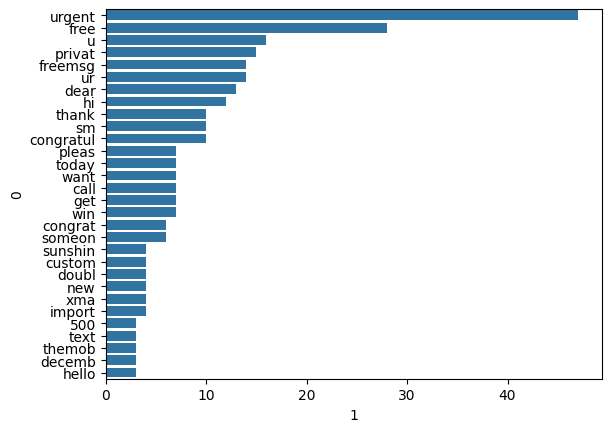

In [28]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],
y=pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.show()

In [29]:
ham_corpus=[]
for msg in df[df['Target']==1]['transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

480

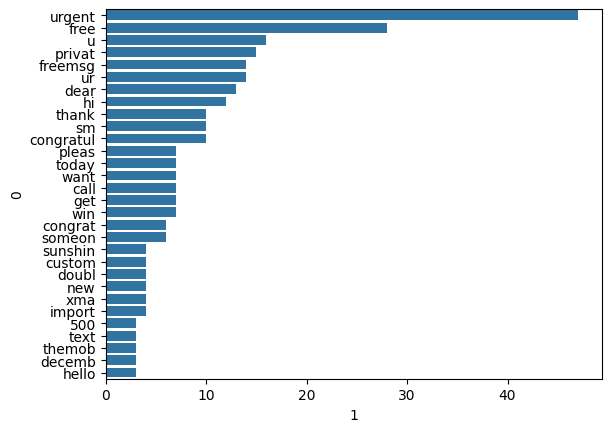

In [30]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],
y=pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.show()

#### MODEL BUILING ####
#### FEATURE EXTRACTION ####

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['transformed_Text']).toarray()
y=df['Target'].values 

#### SPLITTING DATA TRAINING DATA AND TEST DATA ####

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

#### TRAINING THE MODEL ####
#### LOGISTIC REGRESSION ####

In [33]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

#### MULTINOMIALNB ####

In [34]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

MultinomialNB()

#### EVALUATING THE TRAINING MODEL ####

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

#### LOGISTIC REGRESSION EVALUATION ####

In [36]:
#PREDICTION ON TEST DATA
y_pred0 = lrc.predict(x_test)
print(accuracy_score(y_test, y_pred0))
print(confusion_matrix(y_test, y_pred0))
print(precision_score(y_test, y_pred0))

0.8868471953578336
[[894   0]
 [117  23]]
1.0


#### MULTINOMIALNB EVALUATION ####

In [37]:
#PREDICTION ON TEST DATA
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8868471953578336
[[894   0]
 [117  23]]
1.0


#### BUILDING A PREDICTIVE SYSTEM ####

In [38]:
input_msg="you've won! congratulations! you've won a $500 amazon gift card.claim it here"

In [39]:
#TRANSFORMING INPUT DATA 
transformedInput = transformText(input_msg)
vector_input = tfidf.transform([transformedInput])

In [40]:
#MAKING PREDICTION
prediction = mnb.predict(vector_input)[0]
if(prediction==1):
    print("spam SMS")
else:
    print("Ham SMS")

Ham SMS
